In [1]:
import pandas as pd
import numpy as np 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
                                                                            
%matplotlib inline
pd.set_option('display.max_rows', 500)

In [2]:
df_2019 = pd.read_csv('survey_2019.csv')
df_2020 = pd.read_csv('survey_2020.csv')
df_2021 = pd.read_csv('survey_2021.csv')
schema_2019 = pd.read_csv('survey_schema_2019.csv')
schema_2020 = pd.read_csv('survey_schema_2020.csv')
schema_2021 = pd.read_csv('survey_schema_2021.csv')

##### Number of rows and columns

In [3]:
print('Columns: {}'.format(df_2019.shape[1]))
print('Rows: {}'.format(df_2019.shape[0]))

Columns: 85
Rows: 88883


In [4]:
print('Columns: {}'.format(df_2020.shape[1]))
print('Rows: {}'.format(df_2020.shape[0]))

Columns: 61
Rows: 64461


In [5]:
print('Columns: {}'.format(df_2021.shape[1]))
print('Rows: {}'.format(df_2021.shape[0]))

Columns: 48
Rows: 83439


##### Columns with no missing value

In [6]:
set(df_2019.columns[df_2019.isnull().mean() == 0])

{'Hobbyist', 'OpenSourcer', 'Respondent'}

#####  Columns with most missing values

In [7]:
set(df_2019.columns[df_2019.isnull().mean() > 0.09])

{'Age',
 'BlockchainIs',
 'BlockchainOrg',
 'CareerSat',
 'CodeRev',
 'CodeRevHrs',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'Ethnicity',
 'FizzBuzz',
 'ImpSyn',
 'JobFactors',
 'JobSat',
 'JobSeek',
 'LastHireDate',
 'LastInt',
 'MgrIdiot',
 'MgrMoney',
 'MgrWant',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'PurchaseHow',
 'PurchaseWhat',
 'ResumeUpdate',
 'SOHowMuchTime',
 'SONewContent',
 'SOPartFreq',
 'ScreenName',
 'Sexuality',
 'UndergradMajor',
 'UnitTests',
 'WebFrameDesireNextYear',
 'WebFrameWorkedWith',
 'WorkChallenge',
 'WorkLoc',
 'WorkPlan',
 'WorkRemote',
 'WorkWeekHrs',
 'YearsCodePro'}

In [8]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

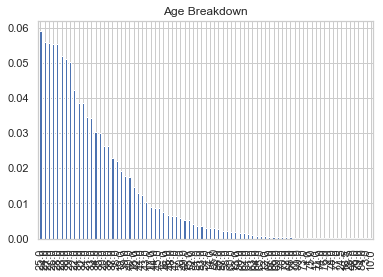

In [9]:
df_2019['Age'].value_counts(normalize= True).sort_values(ascending=False)[:10].plot(kind="bar")
plt.title("Age Breakdown");

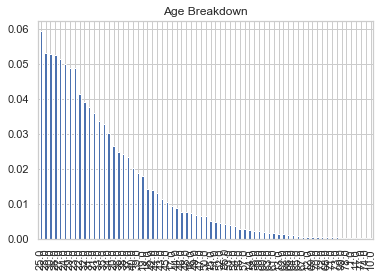

In [10]:
df_2020['Age'].value_counts(normalize= True).sort_values(ascending=False)[:10].plot(kind="bar")
plt.title("Age Breakdown");

#### This needs to be cleaned up and the ages have to be grouped into buckets.

In [11]:
bins = [0, 17, 24, 34, 44, 54, 64, 120]
labels = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
df_2019['age_bins'] = pd.cut(df_2019.Age, bins, labels = labels,include_lowest = True)
df_2020['age_bins'] = pd.cut(df_2020.Age, bins, labels = labels,include_lowest = True)

In [12]:
print('Number of countries in 2019: {}'.format(len(df_2019['Country'].unique())))
print('Number of countries in 2020: {}'.format(len(df_2020['Country'].unique())))
print('Number of countries in 2021: {}'.format(len(df_2021['Country'].unique())))


Number of countries in 2019: 180
Number of countries in 2020: 184
Number of countries in 2021: 181


##### Get value counts of columns and visualize as historgram

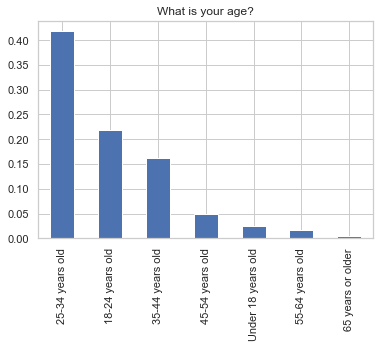

In [13]:
status_vals = df_2019['age_bins'].value_counts()

(status_vals/df_2019.shape[0]).plot(kind="bar");
plt.title("What is your age?");

## Business Questions:

#### 1. Where are our survey respondents from? How has it changed over time?

Visualized the countries they are from as a percent of total to put it into context across 3 years

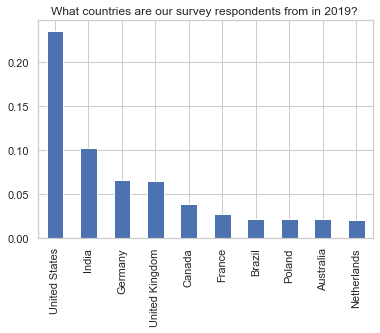

In [14]:
### 2019 

status_vals = df_2019['Country'].value_counts().sort_values(ascending = False)#Provide a pandas series of the counts for each Professional status

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(status_vals/df_2019.shape[0])[:10].plot(kind="bar");
plt.title("What countries are our survey respondents from in 2019? ");

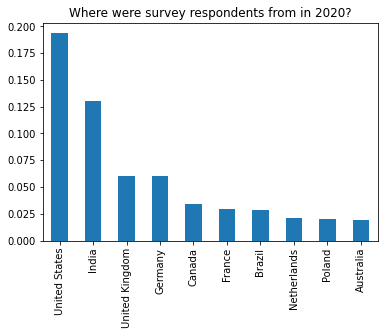

In [69]:
#### 2020
status_vals = df_2020['Country'].value_counts().sort_values(ascending=False)

(status_vals/df_2020.shape[0])[:10].plot(kind="bar");
plt.title("Where were survey respondents from in 2020?");

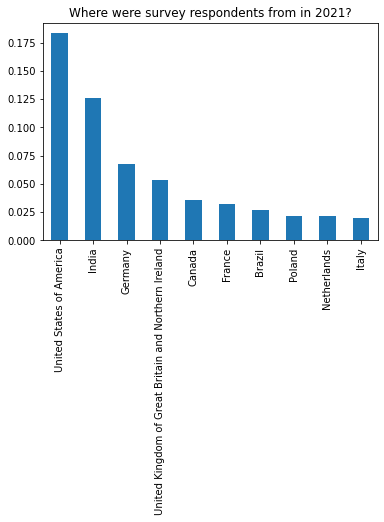

In [70]:
#### 2021
status_vals = df_2021['Country'].value_counts().sort_values(ascending=False)

(status_vals/df_2021.shape[0])[:10].plot(kind="bar");
plt.title("Where were survey respondents from in 2021?");

#### How old are our respondents? How has this varied over the years ?

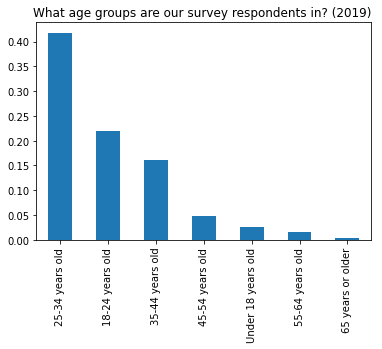

In [79]:
### 2019 

status_vals = df_2019['age_bins'].value_counts().sort_values(ascending = False)#Provide a pandas series of the counts

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(status_vals/df_2019.shape[0])[:10].plot(kind="bar");
plt.title("What age groups are our survey respondents in? (2019) ");

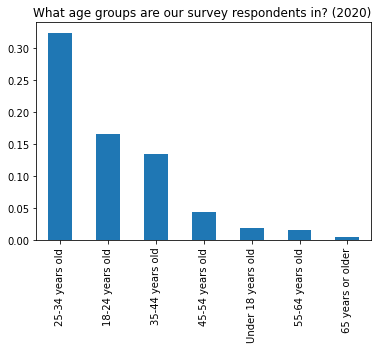

In [78]:
### 2020

status_vals = df_2020['age_bins'].value_counts().sort_values(ascending = False)#Provide a pandas series of the counts

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(status_vals/df_2020.shape[0])[:10].plot(kind="bar");
plt.title("What age groups are our survey respondents in? (2020) ");

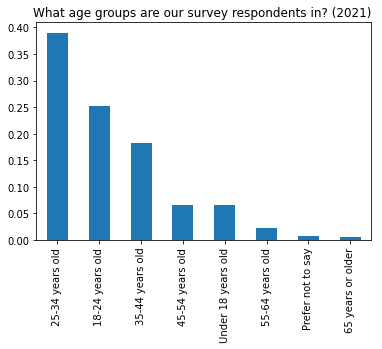

In [77]:
### 2021

status_vals = df_2021['Age'].value_counts().sort_values(ascending = False)#Provide a pandas series of the counts

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(status_vals/df_2021.shape[0])[:10].plot(kind="bar");
plt.title("What age groups are our survey respondents in? (2021) ");

#### Are there more respondents under 18 years old participating from all countries or is this limited to a few countries ?

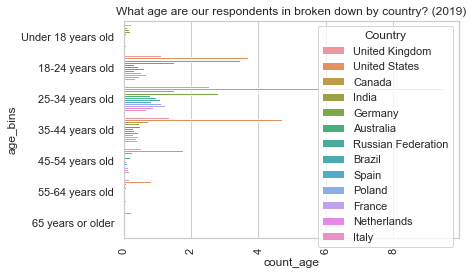

In [24]:
### 2019 

df_2019['count_age'] = df_2019.groupby(['age_bins','Country'])['age_bins'].transform('count')/df_2019.shape[0] *100 #Provide a pandas series of the counts
df_2019_filter = df_2019[df_2019['Country'].isin(['Australia','Brazil','Canada','France','Germany','India','Italy','Netherlands','Poland','Russian Federation','Spain','United Kingdom','United States'])]
sns.barplot(x="count_age", y="age_bins", data=df_2019_filter, hue = "Country")
plt.xticks(rotation = 90) 
plt.title("What age are our respondents in broken down by country? (2019)");

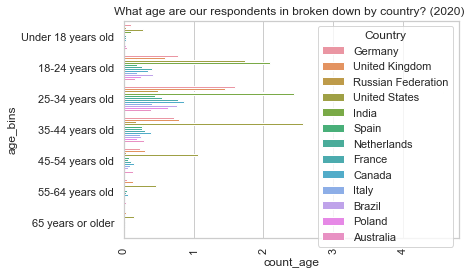

In [25]:
### 2020 

df_2020['count_age'] = df_2020.groupby(['age_bins','Country'])['age_bins'].transform('count')/df_2019.shape[0] *100 #Provide a pandas series of the counts
df_2020_filter = df_2020[df_2020['Country'].isin(['Australia','Brazil','Canada','France','Germany','India','Italy','Netherlands','Poland','Russian Federation','Spain','United Kingdom','United States'])]
sns.barplot(x="count_age", y="age_bins", data=df_2020_filter, hue = "Country")
plt.xticks(rotation = 90) 
plt.title("What age are our respondents in broken down by country? (2020) ");